# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


In [1]:
%matplotlib inline
import pandas as pd

In [2]:

import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import tfFaceDetector as faceDetector
faceDetector.processDatabase(dataset, names)

Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

# headPose dataset の検出処理後のデータ解析

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0     429            429             429     429    429   429
1    2361           2361            2361    2361   2361  2361
         name  truePositives  falsePositives    angles     pitch      yaws
num                                                                       
0    0.153763       0.153763        0.153763  0.153763  0.153763  0.153763
1    0.846237       0.846237        0.846237  0.846237  0.846237  0.846237


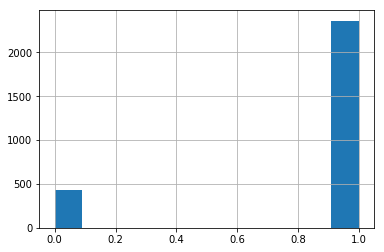

In [4]:
import pandas as pd
df = pd.read_csv("log_headPose_0.csv")

import readheadPose
pitches = []
yaws = []
angles = []
for index, rows in df.iterrows():
#    print index, rows["name"]
    pitch, yaw = readheadPose.getAngles(rows["name"])
    pitches.append(float(pitch))    
    yaws.append(float(yaw))    
    angles.append("%s_%s" % (pitch, yaw))

df["angles"] = angles
df["pitch"] = pitches
df["yaws"] = yaws
df["num"].hist(bins=11)
print df.groupby("num").count()
print df.groupby("num").count()/float(df.shape[0])
#print df.groupby("angles", "num").count()



In [5]:
print df.groupby("angles").count()

         name  num  truePositives  falsePositives  pitch  yaws
angles                                                        
+0_+0      30   30             30              30     30    30
+0_+15     30   30             30              30     30    30
+0_+30     30   30             30              30     30    30
+0_+45     30   30             30              30     30    30
+0_+60     30   30             30              30     30    30
+0_+75     30   30             30              30     30    30
+0_+90     30   30             30              30     30    30
+0_-15     30   30             30              30     30    30
+0_-30     30   30             30              30     30    30
+0_-45     30   30             30              30     30    30
+0_-60     30   30             30              30     30    30
+0_-75     30   30             30              30     30    30
+0_-90     30   30             30              30     30    30
+15_+0     30   30             30              30     3

In [6]:
print df.groupby("angles").mean()

              num  truePositives  falsePositives  pitch  yaws
angles                                                       
+0_+0    1.000000       1.000000               0      0     0
+0_+15   1.000000       1.000000               0      0    15
+0_+30   1.000000       1.000000               0      0    30
+0_+45   0.933333       0.933333               0      0    45
+0_+60   0.933333       0.933333               0      0    60
+0_+75   0.900000       0.900000               0      0    75
+0_+90   0.833333       0.833333               0      0    90
+0_-15   1.000000       1.000000               0      0   -15
+0_-30   1.000000       1.000000               0      0   -30
+0_-45   1.000000       1.000000               0      0   -45
+0_-60   0.933333       0.933333               0      0   -60
+0_-75   0.933333       0.933333               0      0   -75
+0_-90   0.966667       0.966667               0      0   -90
+15_+0   1.000000       1.000000               0     15     0
+15_+15 

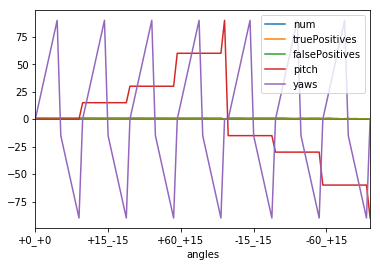

In [7]:
df.groupby("angles").mean().plot()

In [8]:
table = df.groupby("angles").mean()
print table

              num  truePositives  falsePositives  pitch  yaws
angles                                                       
+0_+0    1.000000       1.000000               0      0     0
+0_+15   1.000000       1.000000               0      0    15
+0_+30   1.000000       1.000000               0      0    30
+0_+45   0.933333       0.933333               0      0    45
+0_+60   0.933333       0.933333               0      0    60
+0_+75   0.900000       0.900000               0      0    75
+0_+90   0.833333       0.833333               0      0    90
+0_-15   1.000000       1.000000               0      0   -15
+0_-30   1.000000       1.000000               0      0   -30
+0_-45   1.000000       1.000000               0      0   -45
+0_-60   0.933333       0.933333               0      0   -60
+0_-75   0.933333       0.933333               0      0   -75
+0_-90   0.966667       0.966667               0      0   -90
+15_+0   1.000000       1.000000               0     15     0
+15_+15 

In [9]:
table.to_csv("table.csv")

In [10]:
table.sort_values("num")

,num,truePositives,falsePositives,pitch,yaws
angles,,,,,
+90_+0,0.133333,0.133333,0,90,0
-90_+0,0.300000,0.300000,0,-90,0
-60_-60,0.333333,0.333333,0,-60,-60
-60_+75,0.333333,0.333333,0,-60,75
-60_-75,0.400000,0.400000,0,-60,-75
-60_-90,0.400000,0.400000,0,-60,-90
-60_+90,0.433333,0.433333,0,-60,90
-60_-30,0.433333,0.433333,0,-60,-30
-60_+0,0.500000,0.500000,0,-60,0


In [11]:
X = table["yaws"]
Y = table["pitch"]
Z = table["num"]


import pylab as plt
plt.contour(X, Y, Z)

import numpy as np

yawsAr = np.array((-90, -75, -60, -45, -30, -15, 0,15,30,45,60,75,90))


pitchsAr = np.array((-60, -45, -30, -15, 0, 15, 30, 45, 60))

X, Y = np.meshgrid(yawsAr, pitchesAr)


In [12]:
df["num"].mean()


0.8462365591397849

In [13]:
print df[df["num"]==0]


                                         name  num  truePositives  \
0      headPose/Person01/person01100-90+0.jpg    0              0   
1     headPose/Person01/person01101-60-90.jpg    0              0   
2     headPose/Person01/person01102-60-75.jpg    0              0   
3     headPose/Person01/person01103-60-60.jpg    0              0   
4     headPose/Person01/person01104-60-45.jpg    0              0   
5     headPose/Person01/person01105-60-30.jpg    0              0   
6     headPose/Person01/person01106-60-15.jpg    0              0   
7      headPose/Person01/person01107-60+0.jpg    0              0   
8     headPose/Person01/person01108-60+15.jpg    0              0   
9     headPose/Person01/person01109-60+30.jpg    0              0   
10    headPose/Person01/person01110-60+45.jpg    0              0   
11    headPose/Person01/person01111-60+60.jpg    0              0   
12    headPose/Person01/person01112-60+75.jpg    0              0   
13    headPose/Person01/person0111

pitch　が 90 のデータは検出されていないものが多いことがわかる。

In [14]:
print df[df["pitch"]==90]

                                        name  num  truePositives  \
92    headPose/Person01/person01192+90+0.jpg    0              0   
185   headPose/Person01/person01292+90+0.jpg    1              1   
278   headPose/Person02/person02192+90+0.jpg    1              1   
371   headPose/Person02/person02292+90+0.jpg    1              1   
464   headPose/Person03/person03192+90+0.jpg    0              0   
557   headPose/Person03/person03292+90+0.jpg    0              0   
650   headPose/Person04/person04192+90+0.jpg    0              0   
743   headPose/Person04/person04292+90+0.jpg    0              0   
836   headPose/Person05/person05192+90+0.jpg    0              0   
929   headPose/Person05/person05292+90+0.jpg    0              0   
1022  headPose/Person06/person06192+90+0.jpg    0              0   
1115  headPose/Person06/person06292+90+0.jpg    0              0   
1208  headPose/Person07/person07192+90+0.jpg    0              0   
1301  headPose/Person07/person07292+90+0.jpg    

In [15]:
print df[df["pitch"]==90].groupby("num").count()

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0      26             26              26      26     26    26
1       4              4               4       4      4     4


30 枚中の17 枚で検出がなかったことを示している。


In [16]:
print df[df["num"]==2]


Empty DataFrame
Columns: [name, num, truePositives, falsePositives, angles, pitch, yaws]
Index: []


In [17]:
print df["truePositives"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      1
20      0
21      1
22      1
23      0
24      0
25      0
26      0
27      1
28      1
29      0
       ..
2760    1
2761    1
2762    1
2763    1
2764    1
2765    1
2766    1
2767    1
2768    1
2769    1
2770    1
2771    1
2772    1
2773    1
2774    1
2775    0
2776    1
2777    1
2778    1
2779    1
2780    1
2781    1
2782    1
2783    1
2784    1
2785    1
2786    1
2787    1
2788    1
2789    0
Name: truePositives, dtype: int64


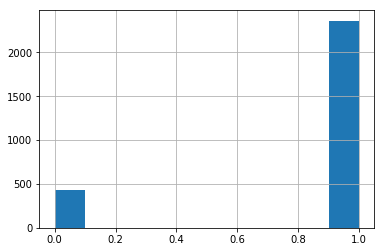

In [18]:
df["truePositives"].hist()

In [19]:
df.shape


(2790, 7)

In [20]:
print df.groupby("truePositives").count()

               name   num  falsePositives  angles  pitch  yaws
truePositives                                                 
0               430   430             430     430    430   430
1              2360  2360            2360    2360   2360  2360


In [21]:
2754/2790.0


0.9870967741935484

In [22]:
df[df["truePositives"]==0].count()

name              430
num               430
truePositives     430
falsePositives    430
angles            430
pitch             430
yaws              430
dtype: int64

In [23]:
df[df["truePositives"]==0].count()/float(df.shape[0])


name              0.154122
num               0.154122
truePositives     0.154122
falsePositives    0.154122
angles            0.154122
pitch             0.154122
yaws              0.154122
dtype: float64

未検出は 1.25% である。

In [24]:
df[df["truePositives"]==0]


,name,num,truePositives,falsePositives,angles,pitch,yaws
0,headPose/Person01/person01100-90+0.jpg,0,0,0,-90_+0,-90,0
1,headPose/Person01/person01101-60-90.jpg,0,0,0,-60_-90,-60,-90
2,headPose/Person01/person01102-60-75.jpg,0,0,0,-60_-75,-60,-75
3,headPose/Person01/person01103-60-60.jpg,0,0,0,-60_-60,-60,-60
4,headPose/Person01/person01104-60-45.jpg,0,0,0,-60_-45,-60,-45
5,headPose/Person01/person01105-60-30.jpg,0,0,0,-60_-30,-60,-30
6,headPose/Person01/person01106-60-15.jpg,0,0,0,-60_-15,-60,-15
7,headPose/Person01/person01107-60+0.jpg,0,0,0,-60_+0,-60,0
8,headPose/Person01/person01108-60+15.jpg,0,0,0,-60_+15,-60,15
9,headPose/Person01/person01109-60+30.jpg,0,0,0,-60_+30,-60,30
